# Group Project
## Group G-9
### Vinay Bendale 20118103
### Prateek Chauhan 20118060
### Rohit Malawat 20118069

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from CBFV.composition import generate_features
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import pymatgen as mp
from pymatgen.ext.matproj import MPRester,Element
import seaborn as sns

In [2]:
mpr = MPRester("LiMBtzcH1cD5PCTB")

### Getting Dataset

In [3]:
data = mpr.query({'band_gap': {'$exists': True}}, ['pretty_formula','band_gap'])
df = pd.DataFrame(data)
df.head()

  0%|          | 0/126335 [00:00<?, ?it/s]

,pretty_formula,band_gap
0,ZrB6,0.0000
1,SiC,0.0000
2,HPbI3,0.0000
3,BrCl,1.8278
4,EuFeO3,0.0000


In [4]:
df.describe()

,band_gap
count,126335.000000
mean,1.056167
std,1.526405
min,0.000000
25%,0.000000
50%,0.041600
75%,1.857750
max,17.902300


### Generating Features

In [5]:
rename = {'pretty_formula': 'formula', 'band_gap':'target'}
df = df.rename(columns = rename)
df.head()

,formula,target
0,ZrB6,0.0000
1,SiC,0.0000
2,HPbI3,0.0000
3,BrCl,1.8278
4,EuFeO3,0.0000


In [6]:
X, y,formulae ,skipped = generate_features(df, elem_prop = 'oliynyk',drop_duplicates = True)

Duplicate formula(e) removed using default pandas function



Processing Input Data: 100%|███████████████████████████████████████████████████| 89444/89444 [00:09<00:00, 9144.05it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████| 89444/89444 [00:15<00:00, 5853.17it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


In [8]:
print(X.shape)
X.head()

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,10.0,22.298571,2.428571,11.714286,5.714286,0.142857,0.0,0.857143,68.0,1.142857,...,3.000,2352.15,4275.00,2.34000,1.020,50.20000,489.7000,27.00000,573.0,5.81
1,10.0,20.048250,2.500000,14.000000,6.500000,0.000000,1.0,0.000000,77.5,1.000000,...,1.800,1683.15,2628.15,2.25000,0.710,50.55000,355.8000,129.00000,452.0,4.63
2,48.4,117.784270,4.400000,13.200000,7.200000,0.200000,0.8,0.000000,92.2,0.800000,...,5.000,386.65,457.15,4.93000,0.214,7.82400,20.7520,0.44900,107.0,1.11
3,26.0,57.678350,3.500000,17.000000,8.000000,0.000000,1.0,0.000000,94.5,1.000000,...,2.200,172.15,238.55,0.00321,0.473,3.23000,10.2000,0.00890,112.0,1.22
4,22.6,51.162040,3.200000,11.800000,5.600000,0.400000,0.6,0.000000,68.2,1.600000,...,0.793,54.75,90.15,0.00143,0.920,0.22259,3.4099,0.02674,249.0,2.62


### Splitting Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

### Scaling

In [10]:
sc = StandardScaler()
sc.fit_transform(X_train, y_train)
sc.transform(X_test)

array([[-0.10138164, -0.14334822,  0.37363845, ..., -0.16616839,
         0.92146077,  0.89690506],
       [-0.84328393, -0.82958745, -0.70650049, ..., -0.41574764,
         1.68313205,  1.64192815],
       [-0.86612575, -0.84819863, -0.79726847, ..., -0.41573561,
        -0.11280865, -0.03802588],
       ...,
       [-1.01596808, -0.97411948, -1.00830402, ...,  0.92397921,
        -0.81835679, -0.76113653],
       [-0.27534494, -0.27859771, -0.19819981, ..., -0.41573561,
        -0.11280865, -0.03802588],
       [ 0.4906783 ,  0.54634019,  0.29194727, ..., -0.41574764,
         1.68313205,  1.64192815]])

In [11]:
r2_values = []
mae = []

### Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred_lr = lr.predict(X_test)

In [14]:
r2_values.append(r2_score(y_test, y_pred_lr))
r2_score(y_test, y_pred_lr)

0.4693513605977281

In [15]:
mae.append(mean_absolute_error(y_test, y_pred_lr))
mean_absolute_error(y_test, y_pred_lr)

0.8185539982487382

In [16]:
mean_squared_error(y_test, y_pred_lr)

1.2233630486570637

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


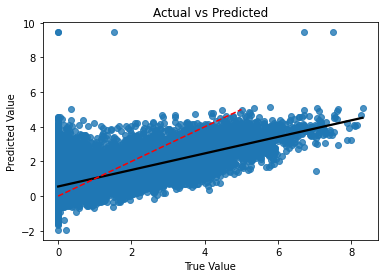

In [25]:
sns.regplot(y_test, y_pred_lr,line_kws={"color": "black"})
plt.plot([0,1,5],[0,1,5],linestyle = '--',color = 'r')#to plot y=x
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

### Random Forest Regression

In [20]:
rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [21]:
y_pred_rfr = rfr.predict(X_test)

In [22]:
r2_values.append(r2_score(y_test, y_pred_rfr))
r2_score(y_test, y_pred_rfr)

0.7552925211632628

In [23]:
mae.append(mean_absolute_error(y_test, y_pred_rfr))
mean_absolute_error(y_test, y_pred_rfr)

0.42042612092786047

In [24]:
mean_squared_error(y_test, y_pred_rfr)

0.5641512388990646

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


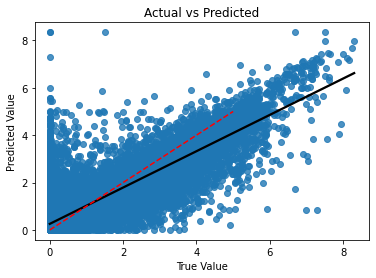

In [26]:
sns.regplot(y_test, y_pred_rfr, line_kws={"color": "black"})
plt.plot([0,1,5],[0,1,5],linestyle = '--',color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

### Lasso Regression

In [27]:
las = Lasso(alpha = 0.1, random_state = 69)
las.fit(X_train, y_train)

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+03, tolerance: 2.361e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=69)

In [28]:
y_pred_las = las.predict(X_test)

In [29]:
r2_values.append(r2_score(y_test, y_pred_las))
r2_score(y_test, y_pred_las)

0.39121016772650086

In [30]:
mae.append(mean_absolute_error(y_test, y_pred_las))
mean_absolute_error(y_test, y_pred_las)

0.8988911258157338

In [31]:
mean_squared_error(y_test, y_pred_las)

1.4035105904359768

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


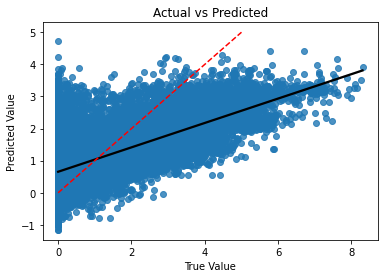

In [32]:
sns.regplot(y_test, y_pred_las, line_kws={"color": "black"})
plt.plot([0,1,5],[0,1,5],linestyle = '--',color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

### Ridge Regression

In [33]:
rid = Ridge(random_state = 69)
rid.fit(X_train, y_train)

Ridge(random_state=69)

In [34]:
y_pred_rid = rid.predict(X_test)

In [35]:
r2_values.append(r2_score(y_test, y_pred_rid))
r2_score(y_test, y_pred_rid)

0.46923486630452704

In [36]:
mae.append(mean_absolute_error(y_test, y_pred_rid))
mean_absolute_error(y_test, y_pred_rid)

0.8184301683880489

In [37]:
mean_squared_error(y_test, y_pred_rid)

1.2236316158465361

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


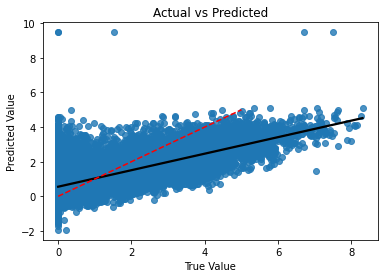

In [38]:
sns.regplot(y_test, y_pred_rid, line_kws={"color": "black"})
plt.plot([0,1,5],[0,1,5],linestyle = '--',color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

### Gradient Boosting Regression

In [40]:
gbr = GradientBoostingRegressor(n_estimators = 10)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=10)

In [41]:
y_pred_gbr = gbr.predict(X_test)

In [42]:
r2_values.append(r2_score(y_test, y_pred_gbr))
r2_score(y_test, y_pred_gbr)

0.38593441793383154

In [43]:
mae.append(mean_absolute_error(y_test, y_pred_gbr))
mean_absolute_error(y_test, y_pred_gbr)

0.9266739048740466

In [44]:
mean_squared_error(y_test, y_pred_gbr)

1.415673360433054

C:\Users\ROHIT MALAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


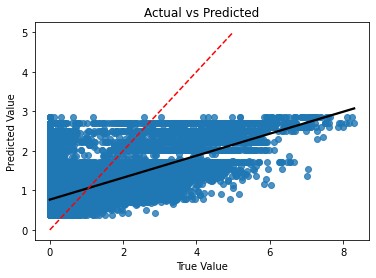

In [45]:
sns.regplot(y_test, y_pred_gbr, line_kws={"color": "black"})
plt.plot([0,1,5],[0,1,5],linestyle = '--',color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

### R2 Values Comparison

In [41]:
labels = ['Linear','RFR','Lasso','Ridge','GBR']

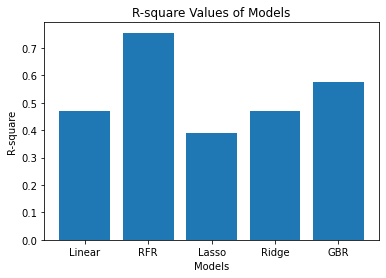

In [48]:
plt.bar(labels, r2_values)
plt.xlabel('Models')
plt.ylabel('R-square')
plt.title('R-square Values of Models')
plt.show()

### Mean Absolute Error Comparison

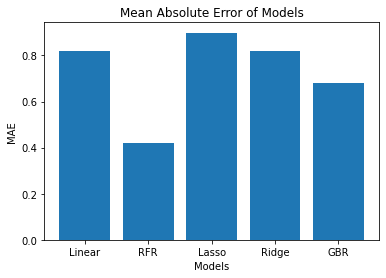

In [47]:
plt.bar(labels, mae)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error of Models')
plt.show()